<a href="https://colab.research.google.com/github/kyleegit27/clustering/blob/main/clustering_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! git clone https://www.github.com/ds4e/clustering

Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 30 (delta 3), reused 1 (delta 1), pack-reused 23 (from 1)
Receiving objects: 100% (30/30), 4.21 MiB | 10.12 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
#modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
#question 1
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [7]:
df0_125.head()


,x1,x2,group
0,0.781279,0.851498,a
1,1.042835,0.931282,a
2,1.144129,0.882494,a
3,0.968445,0.896508,a
4,1.122665,1.013608,a


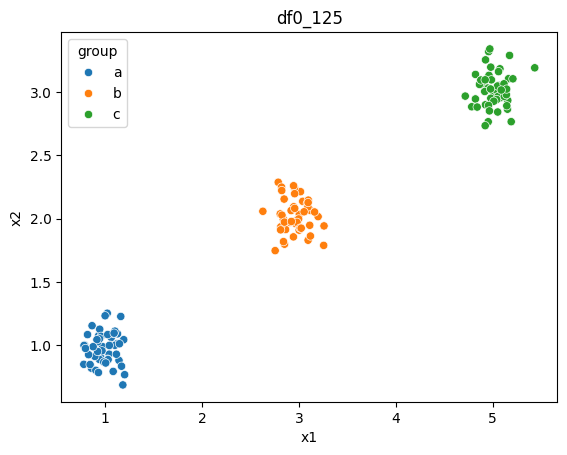

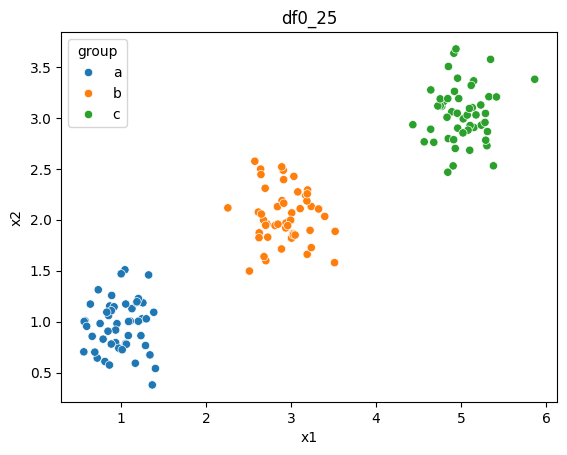

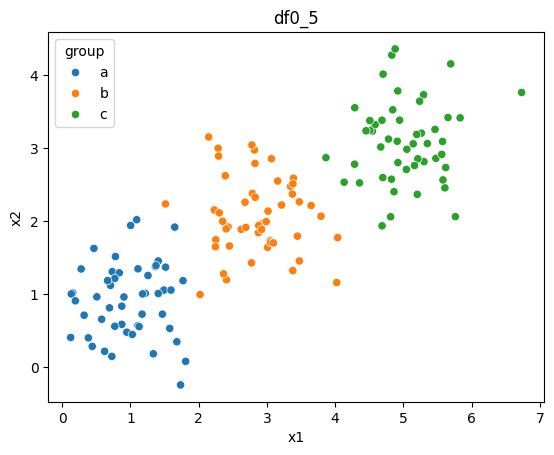

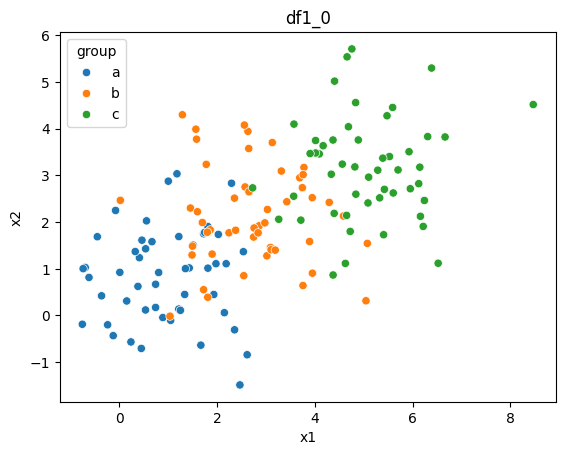

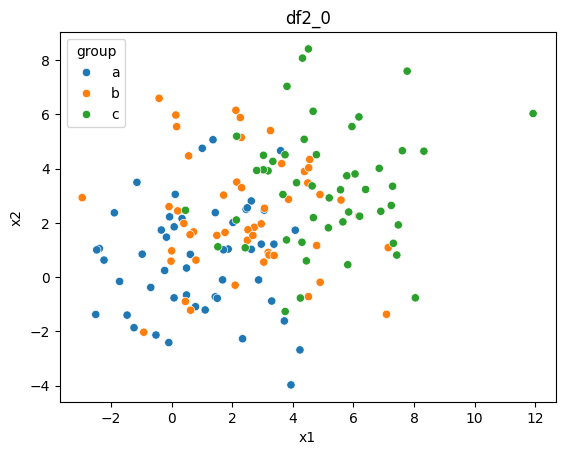

In [8]:
#1.2 Make scatterplots of the (x1,x2) points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

sns.scatterplot(x='x1', y='x2', hue='group', data=df0_125)
plt.title('df0_125')
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df0_25)
plt.title('df0_25')
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df0_5)
plt.title('df0_5')
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df1_0)
plt.title('df1_0')
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df2_0)
plt.title('df2_0')
plt.show()

#As the noise goes up from 0.125 to 2.0, the visual distance of the data goes from three very distinct clusters, to scrambled data with an indistinctive pattern.

In [17]:
#1.3 #Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and
#your ability to definitively select a k. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

from sklearn.cluster import KMeans

#maxmin function
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x


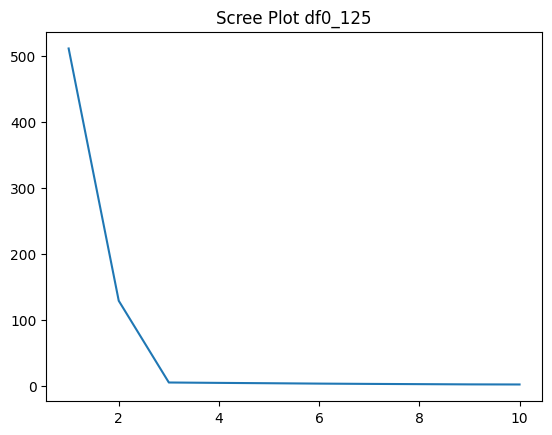

In [10]:
#scree 2

#screen plot df0_125
df0_125_numeric = df0_125[['x1', 'x2']]
k_bar = 10
SSE = []


for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(df0_125_numeric)
  SSE.append(model.inertia_)

scree_plot_0125 = sns.lineplot(x=np.arange(1, k_bar+1), y= SSE).set_title('Scree Plot df0_125')
plt.show()

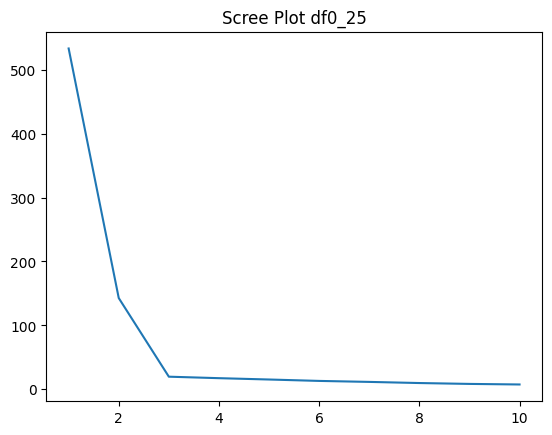

In [14]:
#scree 3
#screen plot
df0_25_numeric = df0_25[['x1', 'x2']]
k_bar = 10
SSE = []


for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(df0_25_numeric)
  SSE.append(model.inertia_)

scree_plot_025 = sns.lineplot(x=np.arange(1, k_bar+1), y= SSE).set_title('Scree Plot df0_25')
plt.show()

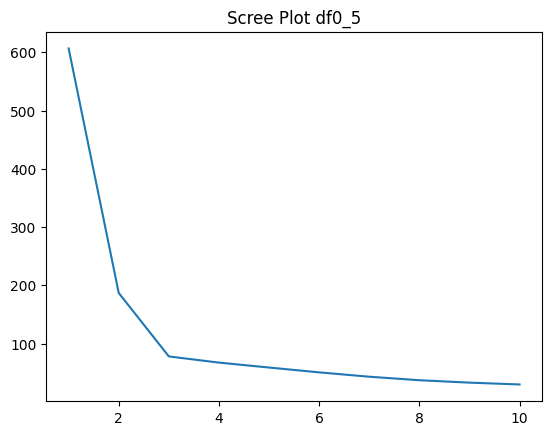

In [15]:
#scree plot
df0_5_numeric = df0_5[['x1', 'x2']]
k_bar = 10
SSE = []


for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(df0_5_numeric)
  SSE.append(model.inertia_)

scree_plot_05 = sns.lineplot(x=np.arange(1, k_bar+1), y= SSE).set_title('Scree Plot df0_5')
plt.show()

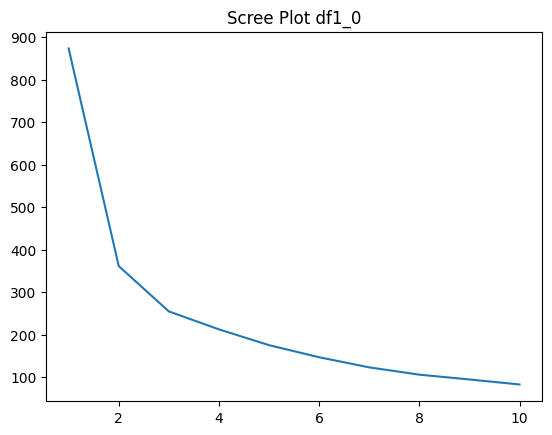

In [16]:
#scree plot
df1_0_numeric = df1_0[['x1', 'x2']]
k_bar = 10
SSE = []


for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(df1_0_numeric)
  SSE.append(model.inertia_)

scree_plot_1_0 = sns.lineplot(x=np.arange(1, k_bar+1), y= SSE).set_title('Scree Plot df1_0')
plt.show()

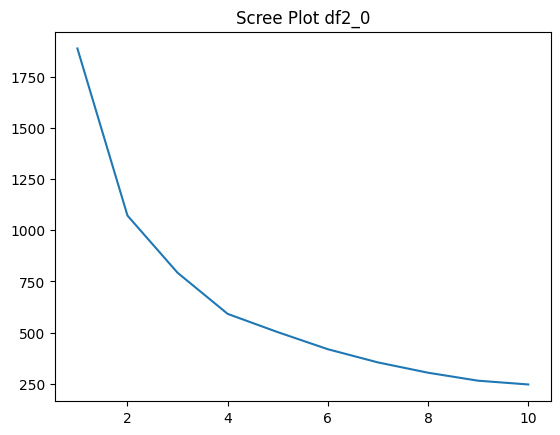

In [18]:
#creating scree plot

k_bar = 10 #?
SSE = [] #stores the training error
df2_0_numeric = df2_0[['x1', 'x2']]

for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(df2_0_numeric)
  SSE.append(model.inertia_) #record SSE for each k in the SSE vector

scree_plot = sns.lineplot(x= np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot df2_0') #creates scree plot
plt.show()

Increasing the noise of the plots made it more difficult to choose a 'k' in that the elbow became less clear and there was more curvature to the scree plot.

In [12]:
#1.4 explain the intuition of the elbow
#The elbow from the scree plot is used to determine 'k'. It makes sense how when there is more noise, it is more difficult for the model to choose
#where to put the clustering centroids. This shows in the graph in the difficulty of choosing the correct 'k' value because of the curvature and less distinction.

In [19]:
#Question 3
army = pd.read_csv('/content/SIPRI Military Expenditure Database.csv')

In [30]:
#select only 2020 and drop rows with missing data, further cleaning if necessary
army = army[army['Year']==2020]

army.isna().sum()

army2 = army.dropna()
army2.isna().sum()



,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
32,32,2020,Afghanistan,279.576955,0.013589,0.049728,7.181899
66,66,2020,Albania,187.433234,0.012583,0.037952,65.126211
100,100,2020,Algeria,9708.277440,0.066600,0.173924,221.392384
134,134,2020,Angola,993.594405,0.014442,0.074624,30.231680
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731


In [31]:
army.columns

Index(['index', 'Year', 'Country', 'Spending (2020 USD)', 'Percent of GDP',
       'Percent of Government Spending', 'Spending per Capita'],
      dtype='object')

In [39]:
#3.2 maxmin normalize spending 2020 and spending per capita;scree plot to determine optimal number of clusters for k means algorithm.
#make scatterplot of spending 2020 + spending per capita, hue dots by cluster membership,
#.groupby(cluster).describe().. patterns, where is US,

from sklearn.cluster import KMeans

#maxmin function

def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

#create norms to add to df
min_x1 = min(army2.loc[:,'Spending (2020 USD)'])
max_x1 = max(army2.loc[:, 'Spending (2020 USD)'])
min_x2 = min(army2.loc[:, 'Spending per Capita'])
max_x2 = max(army2.loc[:, 'Spending per Capita'])

X = army2.loc[:, ['Spending (2020 USD)', 'Spending per Capita']]
X = X.apply(maxmin)
X.head()



,Spending (2020 USD),Spending per Capita
32,0.000348,0.002620
66,0.000230,0.025615
100,0.012461,0.087630
134,0.001265,0.011767
168,0.003626,0.024627


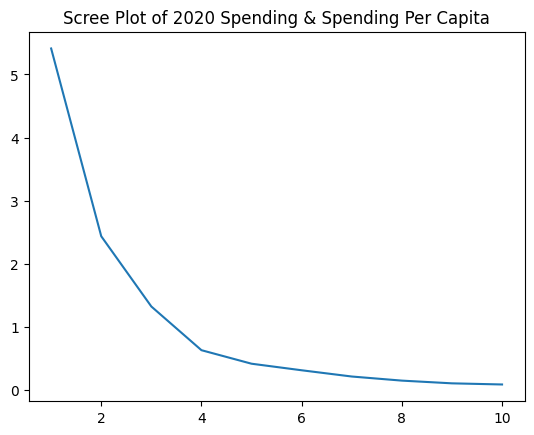

In [40]:
#scree plot of spending 2020 + per capita

k_bar = 10
SSE = []

for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE.append(model.inertia_)

scree_plot_1 = sns.lineplot(x = np.arange(1, k_bar+1), y = SSE).set_title('Scree Plot of 2020 Spending & Spending Per Capita')

#k should be four because this is where the graph starts to level off.

<ipython-input-48-8eeefb4c2fb6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  army2['g_hat'] = model.predict(X)


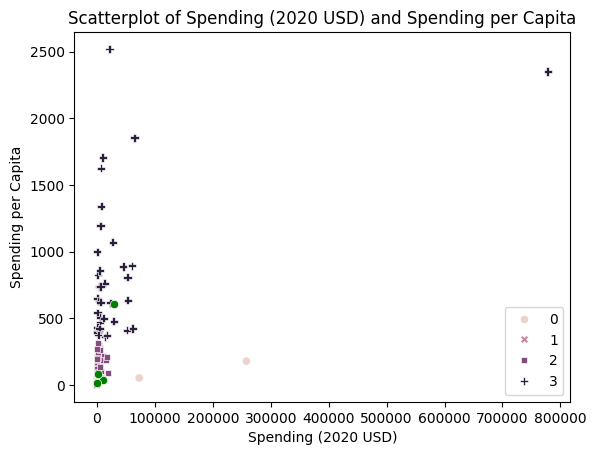

In [48]:
#scatterplot

np.random.seed(10)
initial_centroids = np.random.randint(low = 1, high = X.shape[0], size = 4) #initial centroids
model = KMeans(n_clusters =4, max_iter = 1, init = X.iloc[initial_centroids, :], random_state= 0)
model = model.fit(X) #initialize k means clustering model
army2['g_hat'] = model.predict(X)

#renormalize centers, return to scales of original data
centers = model.cluster_centers_ #computed centers for kmc model
centroids_x_1 = centers[:, 0]*(max_x1-min_x1)+min_x1
centroids_x_2 = centers[:, 1]*(max_x2-min_x2)+min_x2
spending = sns.scatterplot(data=army2, x='Spending (2020 USD)', y= 'Spending per Capita', hue='g_hat', style='g_hat')
plt.title('Scatterplot of Spending (2020 USD) and Spending per Capita')
sns.scatterplot(x=centroids_x_1, y = centroids_x_2, color='green')
plt.show()

In [55]:
army2.sort_values('g_hat')

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
1562,1562,2020,Egypt,4505.374644,0.012242,0.045070,44.026176,0
3704,3704,2020,Myanmar,3208.280460,0.029546,0.138143,45.914890,0
2412,2412,2020,India,72937.064048,0.028846,0.087940,52.852792,0
2446,2446,2020,Indonesia,9386.956718,0.008598,0.048641,34.318585,0
1052,1052,2020,China,257973.429834,0.017988,0.047517,179.232355,0
...,...,...,...,...,...,...,...,...
4282,4282,2020,Poland,13718.291432,0.022983,0.047288,362.467076,3
4316,4316,2020,Portugal,4302.975037,0.018867,0.038486,421.984411,3
4418,4418,2020,Russia,61712.537169,0.042634,0.105861,422.879776,3
3194,3194,2020,Lithuania,1174.056765,0.021276,0.049330,431.321369,3


In [64]:
army2.groupby('g_hat').head(3)

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
32,32,2020,Afghanistan,279.576955,0.013589,0.049728,7.181899,1
66,66,2020,Albania,187.433234,0.012583,0.037952,65.126211,2
100,100,2020,Algeria,9708.277440,0.066600,0.173924,221.392384,2
134,134,2020,Angola,993.594405,0.014442,0.074624,30.231680,1
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731,2
236,236,2020,Australia,27300.894701,0.020118,0.044978,1070.623322,3
270,270,2020,Austria,3601.618603,0.008330,0.014533,399.913236,3
338,338,2020,Bahrain,1404.787234,0.040744,0.114776,825.374403,3
372,372,2020,Bangladesh,4558.171468,0.013019,0.092044,27.677449,0
508,508,2020,Benin,71.817818,0.004706,0.024056,5.924096,1


In [51]:
#descriptions of plot
army2.groupby('g_hat').describe()

index                                                                   \
      count         mean          std    min     25%     50%     75%     max   
g_hat                                                                          
0       8.0  2484.250000  1439.683075  372.0  1434.5  2429.0  3797.5  4248.0   
1      50.0  2969.600000  1645.202549   32.0  1808.5  3194.0  4095.0  5880.0   
2      53.0  2621.773585  1721.903136   66.0  1154.0  2514.0  4180.0  5574.0   
3      37.0  3019.405405  1628.102704  236.0  1834.0  3024.0  4418.0  5540.0   

       Year          ... Percent of Government Spending            \
      count    mean  ...                            75%       max   
g_hat                ...                                            
0       8.0  2020.0  ...                       0.103569  0.174362   
1      50.0  2020.0  ...                       0.071274  0.157918   
2      53.0  2020.0  ...                       0.086353  0.303027   
3      37.0  2020.0  ...                       0.097174  0.225050   

      Spending per Capita                                                  \
                    count        mean         std         min         25%   
g_hat                                                                       
0                     8.0   58.142792   49.624191   27.677449   34.254726   
1                    50.0   16.025157   11.360731    0.580129    7.896661   
2                    53.0  143.781566   78.366698   51.058173   74.866974   
3                    37.0  832.873565  546.241607  362.467076  431.321369   

                                            
              50%         75%          max  
g_hat                                       
0       44.970533   48.505906   179.232355  
1       12.216752   20.553464    43.733044  
2      128.329150  207.239992   314.201312  
3      635.097253  893.778388  2520.398541  

[4 rows x 48 columns]

The United States is in the top right, far away from all the other points with a high spending in 2020 USD and high spending per capita.
There are gropuings by level of developed nation roughly.

In [65]:
army.columns

Index(['index', 'Year', 'Country', 'Spending (2020 USD)', 'Percent of GDP',
       'Percent of Government Spending', 'Spending per Capita'],
      dtype='object')

In [66]:
#3.3 repeat part 2 percent gov spending + percent gdp; compare results to above

#create norms to add to df
min_x3 = min(army2.loc[:,'Percent of Government Spending'])
max_x3 = max(army2.loc[:, 'Percent of Government Spending'])
min_x4 = min(army2.loc[:, 'Percent of GDP'])
max_x4 = max(army2.loc[:, 'Percent of GDP'])

X = army2.loc[:, ['Percent of Government Spending', 'Percent of GDP']]
X = X.apply(maxmin)
X.head()


,Percent of Government Spending,Percent of GDP
32,0.150377,0.137524
66,0.110877,0.127303
100,0.566960,0.676168
134,0.233882,0.146191
168,0.041498,0.073306


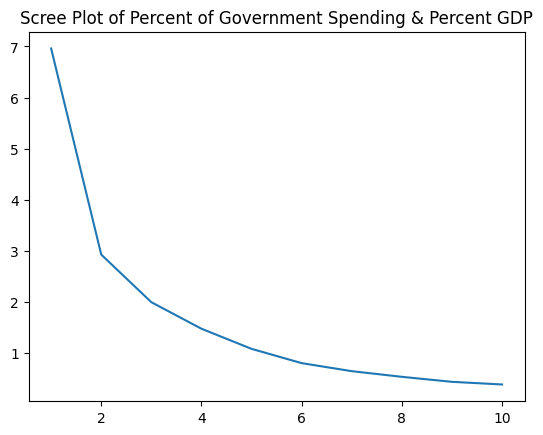

In [67]:
#scree plot of pct gov spending, pct gdp

k_bar = 10
SSE = []

for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE.append(model.inertia_)

scree_plot_2 = sns.lineplot(x = np.arange(1, k_bar+1), y = SSE).set_title('Scree Plot of Percent of Government Spending & Percent GDP')

#k should be four because this is where the graph starts to level off.

In [69]:
army.columns

Index(['index', 'Year', 'Country', 'Spending (2020 USD)', 'Percent of GDP',
       'Percent of Government Spending', 'Spending per Capita'],
      dtype='object')

<ipython-input-70-70fa98586b75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  army2['g_hat'] = model.predict(X)


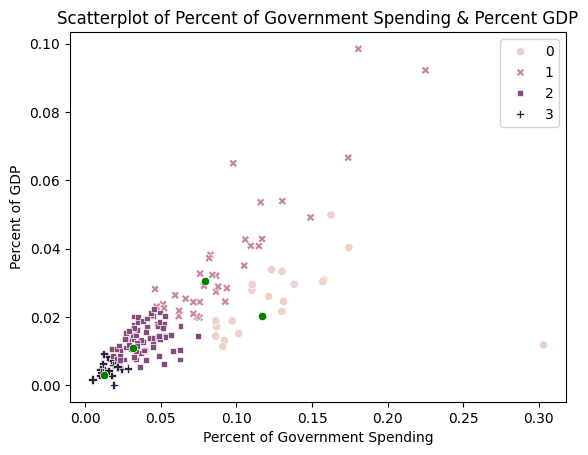

In [70]:
#scatterplot 2

np.random.seed(10)
initial_centroids = np.random.randint(low = 1, high = X.shape[0], size = 4) #initial centroids
model = KMeans(n_clusters =4, max_iter = 1, init = X.iloc[initial_centroids, :], random_state= 0)
model = model.fit(X) #initialize k means clustering model
army2['g_hat'] = model.predict(X)

#renormalize centers, return to scales of original data
centers = model.cluster_centers_ #computed centers for kmc model
centroids_x_1 = centers[:, 0]*(max_x3-min_x3)+min_x3
centroids_x_2 = centers[:, 1]*(max_x4-min_x4)+min_x4
spending = sns.scatterplot(data=army2, x='Percent of Government Spending', y= 'Percent of GDP', hue='g_hat', style='g_hat')
plt.title('Scatterplot of Percent of Government Spending & Percent GDP')
sns.scatterplot(x=centroids_x_1, y = centroids_x_2, color='green')
plt.show()

In [101]:
army2[army2['g_hat']==0].sort_values(by= 'Percent of Government Spending', ascending = True).head(10)

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
2174,2174,2020,Guinea,206.992891,0.014389,0.086329,15.761280,0
4894,4894,2020,Sri Lanka,1529.361955,0.018787,0.086353,71.422125,0
1902,1902,2020,Gabon,263.471597,0.017103,0.086822,118.361005,0
4928,4928,2020,Sudan,934.311154,0.011317,0.090960,21.307468,0
372,372,2020,Bangladesh,4558.171468,0.013019,0.092044,27.677449,0
5064,5064,2020,Taiwan,11923.677599,0.018801,0.097174,500.637259,0
1630,1630,2020,Equatorial Guinea,162.373364,0.015105,0.101501,115.732975,0
2854,2854,2020,"Korea, South",45523.984708,0.027781,0.110270,887.943683,0
4656,4656,2020,Singapore,9978.571429,0.029429,0.110489,1705.738706,0
5404,5404,2020,Uganda,984.759732,0.025971,0.121301,21.529038,0


In [102]:
army2[army2['g_hat']==1].sort_values(by='Percent of Government Spending', ascending = True).head(10)

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
2106,2106,2020,Greece,5301.379232,0.028132,0.046211,508.623163,1
4282,4282,2020,Poland,13718.291432,0.022983,0.047288,362.467076,1
1698,1698,2020,Estonia,718.112390,0.023638,0.051496,541.154778,1
3024,3024,2020,Latvia,742.049470,0.022550,0.052209,393.451469,1
4826,4826,2020,South Sudan,128.916014,0.026340,0.059520,11.516528,1
3670,3670,2020,Mozambique,288.258946,0.020206,0.061866,9.222811,1
5574,5574,2020,Uruguay,1091.535360,0.021777,0.062082,314.201312,1
1528,1528,2020,Ecuador,2356.300000,0.025315,0.066420,133.554384,1
1018,1018,2020,Chile,5286.204683,0.020890,0.071541,276.532992,1
5336,5336,2020,Turkey,17478.413685,0.024322,0.071553,207.239992,1


In [103]:
army2[army2['g_hat']==2].sort_values(by='Percent of Government Spending', ascending = True).head(10)

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
440,440,2020,Belgium,5442.835974,0.010451,0.017648,469.614838,2
576,576,2020,Bosnia and Herzegovina,167.521866,0.008456,0.018506,51.058173,2
4724,4724,2020,Slovenia,567.650747,0.010614,0.020693,273.040282,2
3568,3568,2020,Mongolia,112.178388,0.007653,0.021008,34.221595,2
4962,4962,2020,Sweden,6271.285838,0.011588,0.022364,620.980873,2
5268,5268,2020,Trinidad and Tobago,171.301906,0.007454,0.022808,122.445966,2
2684,2684,2020,Japan,51970.830953,0.010299,0.022870,410.914568,2
4996,4996,2020,Switzerland,6389.669862,0.008496,0.023300,738.263416,2
3500,3500,2020,Mexico,8044.880864,0.007492,0.025832,62.395825,2
1426,1426,2020,Denmark,4980.428135,0.013982,0.026010,859.880548,2


In [104]:
army2[army2['g_hat']==3].sort_values(by = 'Percent of Government Spending', ascending = True).head(10)

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
3466,3466,2020,Mauritius,18.478399,0.001633,0.004896,14.527044,3
2548,2548,2020,Ireland,1144.420381,0.002875,0.009720,231.757874,3
3398,3398,2020,Malta,67.983586,0.004569,0.009989,153.809018,3
3534,3534,2020,Moldova,44.533781,0.003748,0.010507,11.039608,3
3228,3228,2020,Luxembourg,405.790494,0.006273,0.011613,648.227625,3
3126,3126,2020,Liberia,12.123500,0.009147,0.012246,2.396896,3
2072,2072,2020,Ghana,239.887164,0.004462,0.012734,7.720116,3
270,270,2020,Austria,3601.618603,0.008330,0.014533,399.913236,3
4146,4146,2020,Papua New Guinea,85.887097,0.004166,0.015373,9.599541,3
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731,3


In [100]:
#cluster_zero = army2[army2['g_hat']==0]
#cluster_zero.loc[:,['Percent of Government Spending', 'Spending per Capita', 'Country']].groupby('Percent of Government Spending').head(3)

,Percent of Government Spending,Spending per Capita,Country
202,0.162572,213.958961,Armenia
372,0.092044,27.677449,Bangladesh
406,0.303027,74.866974,Belarus
984,0.157918,19.655822,Chad
1154,0.123230,54.074337,"Congo, Republic"
1630,0.101501,115.732975,Equatorial Guinea
1902,0.086822,118.361005,Gabon
2174,0.086329,15.761280,Guinea
2480,0.130047,188.410262,Iran
2854,0.110270,887.943683,"Korea, South"


In [90]:
army2.groupby('g_hat').describe()

index                                                                   \
      count         mean          std    min     25%     50%     75%     max   
g_hat                                                                          
0      20.0  2837.000000  1694.066487  202.0  1511.0  2956.0  4222.5  5404.0   
1      35.0  2810.285714  1814.739336  100.0   984.0  2718.0  4350.0  5574.0   
2      76.0  2865.184211  1611.426769   32.0  1545.0  2837.0  4265.0  5846.0   
3      17.0  2716.000000  1595.215659  168.0  2072.0  3126.0  3534.0  5880.0   

       Year          ... Percent of Government Spending            \
      count    mean  ...                            75%       max   
g_hat                ...                                            
0      20.0  2020.0  ...                       0.142899  0.303027   
1      35.0  2020.0  ...                       0.107668  0.225050   
2      76.0  2020.0  ...                       0.048137  0.074624   
3      17.0  2020.0  ...                       0.018941  0.028296   

      Spending per Capita                                                \
                    count        mean         std        min        25%   
g_hat                                                                     
0                    20.0  224.179593  407.455884  15.761280  28.913309   
1                    35.0  468.510507  663.016858   5.674383  75.388760   
2                    76.0  226.540006  295.179581   3.154734  29.968146   
3                    17.0   94.390881  178.783763   0.580129   5.924096   

                                            
              50%         75%          max  
g_hat                                       
0       62.748231  194.797437  1705.738706  
1      207.239992  465.751469  2520.398541  
2       80.237677  373.360124  1341.058851  
3       11.976349   62.636731   648.227625  

[4 rows x 48 columns]

These clusters are somewhat by location, but not much association.

In [ ]:
#3.4 use k means clustering w all four numeric variables; compare results to previous two parts

In [109]:
army2.columns

Index(['index', 'Year', 'Country', 'Spending (2020 USD)', 'Percent of GDP',
       'Percent of Government Spending', 'Spending per Capita', 'g_hat'],
      dtype='object')

In [110]:
min_x5 = min(army2.loc[:,'Percent of Government Spending'])
max_x5 = max(army2.loc[:, 'Percent of Government Spending'])
min_x6 = min(army2.loc[:, 'Spending per Capita'])
max_x6 = max(army2.loc[:, 'Spending per Capita'])

X = army2.loc[:, ['Percent of Government Spending', 'Spending per Capita']]
X = X.apply(maxmin)
X.head()

,Percent of Government Spending,Spending per Capita
32,0.150377,0.002620
66,0.110877,0.025615
100,0.566960,0.087630
134,0.233882,0.011767
168,0.041498,0.024627


<ipython-input-113-bba034792167>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  army2['g_hat'] = model.predict(X)


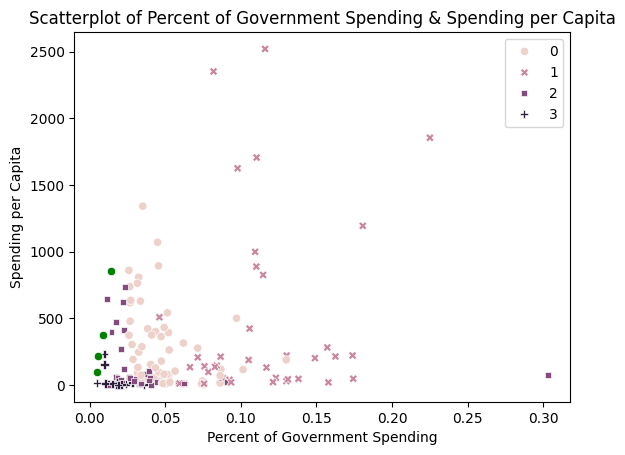

In [113]:
#scatterplot 3

np.random.seed(10)
initial_centroids = np.random.randint(low = 1, high = X.shape[0], size = 4) #initial centroids
model = KMeans(n_clusters =4, max_iter = 1, init = X.iloc[initial_centroids, :], random_state= 0)
model = model.fit(X) #initialize k means clustering model
army2['g_hat'] = model.predict(X)

#renormalize centers, return to scales of original data
centers = model.cluster_centers_ #computed centers for kmc model
centroids_x_1 = centers[:, 0]*(max_x5-min_x5)+min_x5
centroids_x_2 = centers[:, 1]*(max_x6-min_x6)+min_x6
spending = sns.scatterplot(data=army2, x='Percent of Government Spending', y= 'Spending per Capita', hue='g_hat', style='g_hat')
plt.title('Scatterplot of Percent of Government Spending & Spending per Capita')
sns.scatterplot(x=centroids_x_1, y = centroids_x_2, color='green')
plt.show()

This graph is much more spread out across the x-axis than the other graphs and seems to have a bit more movement to the data comparatively.

In [111]:
min_x7 = min(army2.loc[:,'Spending (2020 USD)'])
max_x7 = max(army2.loc[:, 'Spending (2020 USD)'])
min_x8 = min(army2.loc[:, 'Percent of GDP'])
max_x8 = max(army2.loc[:, 'Percent of GDP'])

X = army2.loc[:, ['Spending (2020 USD)', 'Percent of GDP']]
X = X.apply(maxmin)
X.head()

,Spending (2020 USD),Percent of GDP
32,0.000348,0.137524
66,0.000230,0.127303
100,0.012461,0.676168
134,0.001265,0.146191
168,0.003626,0.073306


<ipython-input-117-c7fb59decc83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  army2['g_hat'] = model.predict(X)


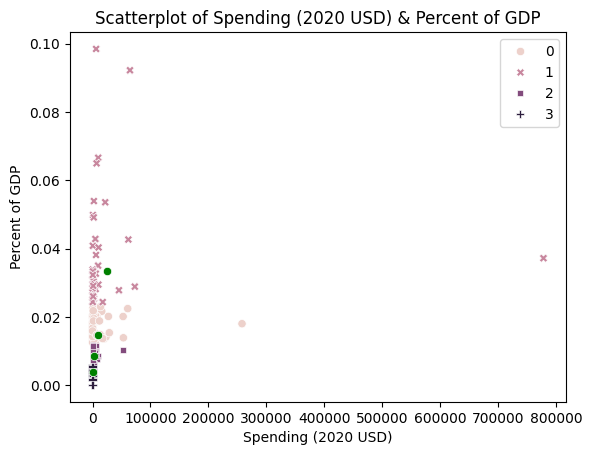

In [117]:
#scatterplot 3

np.random.seed(10)
initial_centroids = np.random.randint(low = 1, high = X.shape[0], size = 4) #initial centroids
model = KMeans(n_clusters =4, max_iter = 1, init = X.iloc[initial_centroids, :], random_state= 0)
model = model.fit(X) #initialize k means clustering model
army2['g_hat'] = model.predict(X)

#renormalize centers, return to scales of original data
centers = model.cluster_centers_ #computed centers for kmc model
centroids_x_1 = centers[:, 0]*(max_x7-min_x7)+min_x7
centroids_x_2 = centers[:, 1]*(max_x8-min_x8)+min_x8
spending = sns.scatterplot(data=army2, x='Spending (2020 USD)', y= 'Percent of GDP', hue='g_hat', style='g_hat')
plt.title('Scatterplot of Spending (2020 USD) & Percent of GDP')
sns.scatterplot(x=centroids_x_1, y = centroids_x_2, color='green')
plt.show()

This graph is less spread out and much more concentrated than the other graphs. There are still a few outliers.